# Gearbox Fault Diagnosis

- [https://www.kaggle.com/brjapon/gearbox-fault-diagnosis](https://www.kaggle.com/brjapon/gearbox-fault-diagnosis)
- [https://openei.org/datasets/dataset/gearbox-fault-diagnosis-data](https://openei.org/datasets/dataset/gearbox-fault-diagnosis-data)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
def load_data(label='h', load=0):
    return pd.read_csv(f'{label}30hz{load}.csv.gz')

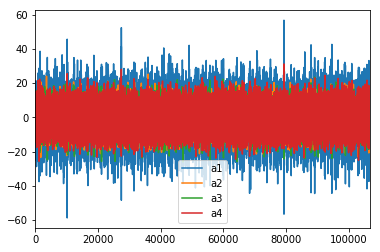

In [8]:
pd.read_csv('h30hz90.csv.gz').plot()

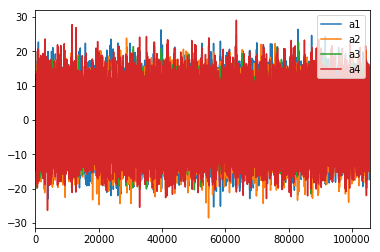

In [9]:
pd.read_csv('b30hz90.csv.gz').plot()

In [16]:
print("Healthy | BrokenTooth")
for i in range(0, 100, 10):
    print(pd.read_csv(f'h30hz{i}.csv.gz').shape,
          pd.read_csv(f'b30hz{i}.csv.gz').shape)
    

Healthy | BrokenTooth
(88832, 4) (88320, 4)
(92928, 4) (111616, 4)
(108544, 4) (114432, 4)
(106240, 4) (89856, 4)
(100608, 4) (94464, 4)
(110848, 4) (94208, 4)
(99840, 4) (95488, 4)
(101376, 4) (100864, 4)
(99840, 4) (110335, 4)
(106752, 4) (105728, 4)


In [46]:
def plot_sequence(df, st=0, ed=None, ax=None, figsize=(10, 3), individual=True):

    if ed is None:
        ed = df.shape[0]

    if individual:
        if not ax is None:
            assert len(ax) == 4
        else:
            fig, ax = plt.subplots(4, figsize=figsize)

        for i in range(4):
            df.iloc[st:ed, i].plot(ax=ax[i], figsize=figsize, legend=True)

    else:
        if ax is None:
            fig, ax = plt.subplots(figsize=figsize)

        df.iloc[st:ed].plot(ax=ax, figsize=figsize, legend=True)

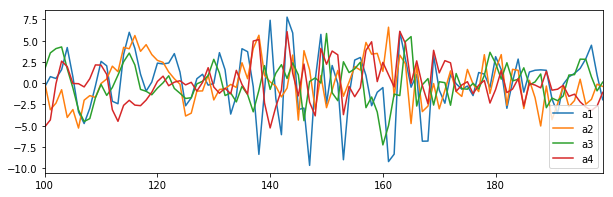

In [52]:
plot_sequence(load_data(), st=100, ed=200, individual=False)

Text(0.5, 1.0, 'Healty: Load= 0')

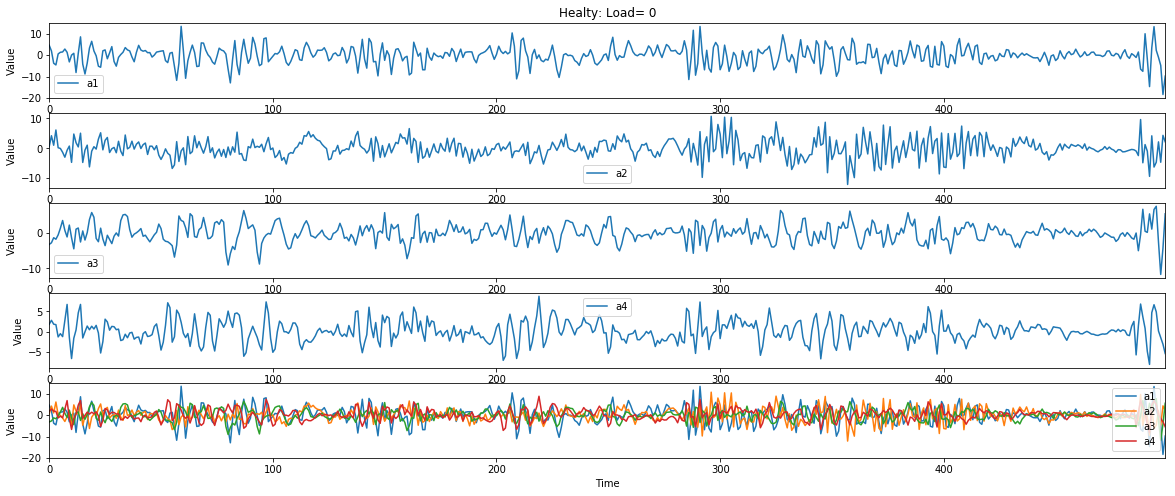

In [75]:
label = 'h'
load = 0
wd = 20
hg = 8
fig, ax = plt.subplots(5)
plot_sequence(load_data(label=label, load=load), st=0, ed=500, ax=ax[:4], figsize=(wd, hg), individual=True)
plot_sequence(load_data(label=label, load=load), st=0, ed=500, ax=ax[-1], figsize=(wd, hg), individual=False)

ax[-1].set_xlabel('Time')
for axi in ax: axi.set_ylabel('Value')
name = 'Healty' if label == 'h' else 'BrokenTooth'
ax[0].set_title(f'{name}: Load= {load}')